In [2]:
data_dir = '/content/drive/MyDrive/AI/COVID-19_Radiography_Dataset' 

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
import os
%matplotlib inline

image_size = (200, 200)


In [3]:
import cv2
import imghdr
image_exts = ['jpeg','jpg', 'bmp', 'png']
image_class=['Not-Covid','COVID']
data_class = os.listdir(data_dir)
data_class

['COVID', 'Not-Covid']

In [ ]:
# data_class.remove('.DS_Store')
# for image_class in data_class: 
#     for image in (os.path.join(data_class, image_class)):
#         image_path = os.path.join(data_class, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
               #os.remove(image_path)

In [4]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
     data_dir,
     labels="inferred",
     label_mode="binary",
     class_names=None,
     color_mode="rgb",
     batch_size=30,
     image_size=image_size,
     shuffle=True,
     seed=40,
     validation_split=None,
     subset=None,
     interpolation="bilinear",
 )
 








Found 3000 files belonging to 2 classes.


In [5]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

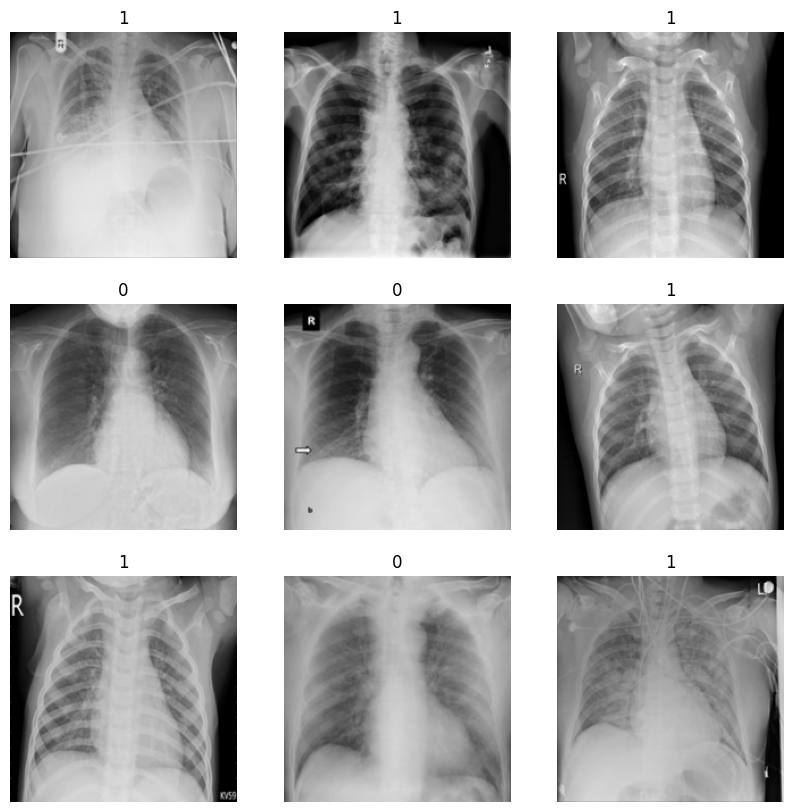

In [6]:
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [7]:
data = dataset.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [8]:
print(train_size,val_size,test_size)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

80 10 10


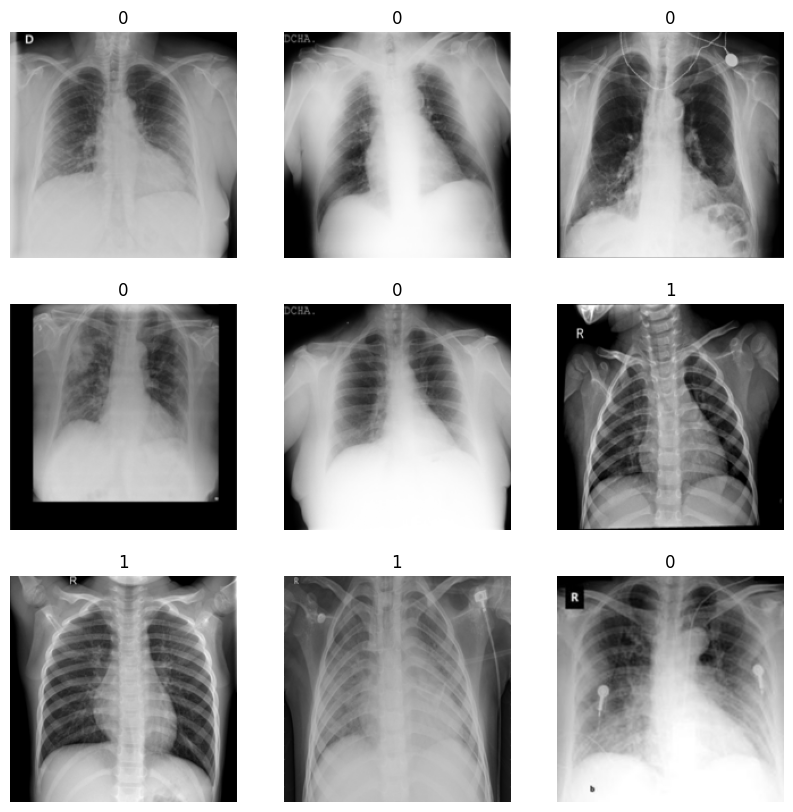

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")
        

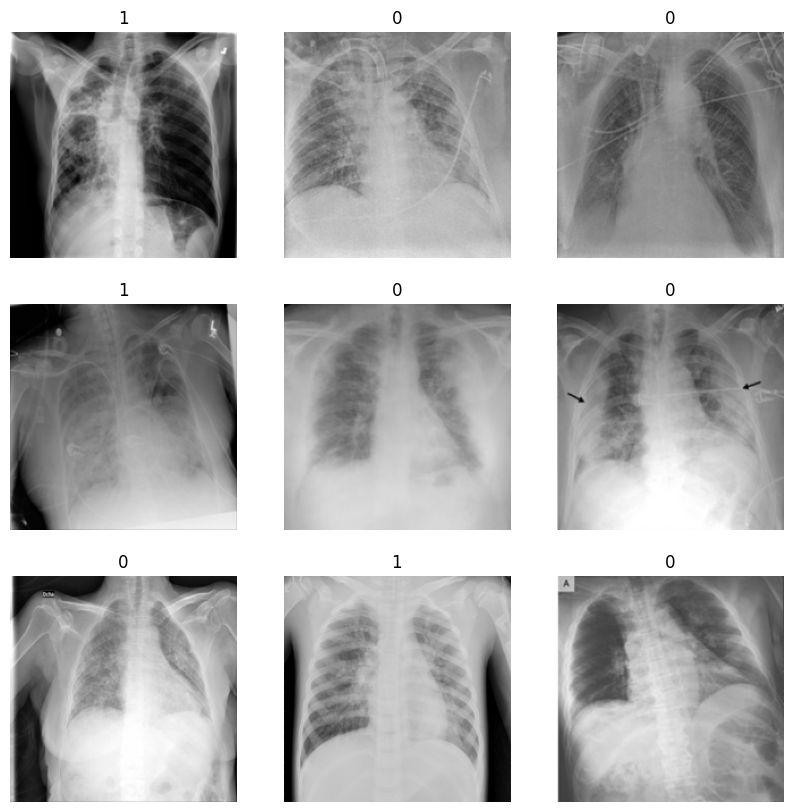

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in val.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization ,AveragePooling2D


import matplotlib.pyplot as plt



model = Sequential()


In [12]:
model.add(Conv2D(32, (3,3), 1, activation='relu',padding="same", input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())




model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.005)
#opt = keras.optimizers.SGD(
 #   learning_rate=0.005, momentum=0.9, name="SGD"
#)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 200, 200, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                        

In [13]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
checkpoint = keras.callbacks.ModelCheckpoint("model-{epoch:03d}-{accuracy}-{val_accuracy}.h5",save_best_only=True,monitor="val_accuracy")




In [14]:
hist = model.fit(train, epochs=50, callbacks=[checkpoint],validation_data=val)





Epoch 1/50
80/80 [==============================] - 59s 491ms/step - loss: 0.4477 - accuracy: 0.8200 - val_loss: 0.6654 - val_accuracy: 0.5867
Epoch 2/50
80/80 [==============================] - 23s 285ms/step - loss: 0.3777 - accuracy: 0.8462 - val_loss: 0.9660 - val_accuracy: 0.5100
Epoch 3/50
80/80 [==============================] - 24s 282ms/step - loss: 0.2751 - accuracy: 0.8821 - val_loss: 0.5748 - val_accuracy: 0.6733
Epoch 4/50
80/80 [==============================] - 25s 302ms/step - loss: 0.2075 - accuracy: 0.9200 - val_loss: 0.4312 - val_accuracy: 0.8000
Epoch 5/50
80/80 [==============================] - 26s 318ms/step - loss: 0.2625 - accuracy: 0.8954 - val_loss: 4.5012 - val_accuracy: 0.4967
Epoch 6/50
80/80 [==============================] - 24s 296ms/step - loss: 0.2243 - accuracy: 0.9092 - val_loss: 0.7534 - val_accuracy: 0.7600
Epoch 7/50
80/80 [==============================] - 25s 302ms/step - loss: 0.1701 - accuracy: 0.9300 - val_loss: 0.2532 - val_accuracy: 0.9067

In [15]:
print(hist.history)
best_score = max(hist.history['val_accuracy'])

print(best_score)

{'loss': [0.447693794965744, 0.37771424651145935, 0.2751411199569702, 0.20748649537563324, 0.26251184940338135, 0.2243395447731018, 0.17012932896614075, 0.1853260099887848, 0.15980546176433563, 0.11279606819152832, 0.13421061635017395, 0.10702719539403915, 0.10947466641664505, 0.08655881881713867, 0.10564588010311127, 0.0638374611735344, 0.052150238305330276, 0.04605335369706154, 0.059648118913173676, 0.06490407884120941, 0.04782530292868614, 0.045609209686517715, 0.040237583220005035, 0.03916458413004875, 0.02585824579000473, 0.024638395756483078, 0.02980107069015503, 0.02661065012216568, 0.035502418875694275, 0.05696578323841095, 0.04681690037250519, 0.08197280019521713, 0.07763363420963287, 0.058213431388139725, 0.14111939072608948, 0.12984949350357056, 0.07422171533107758, 0.06394187361001968, 0.03522081673145294, 0.03510374203324318, 0.059723980724811554, 0.12283830344676971, 0.08324819058179855, 0.046745575964450836, 0.031377505511045456, 0.027128467336297035, 0.01963871158659458

In [16]:
hist.history

{'loss': [0.447693794965744,
  0.37771424651145935,
  0.2751411199569702,
  0.20748649537563324,
  0.26251184940338135,
  0.2243395447731018,
  0.17012932896614075,
  0.1853260099887848,
  0.15980546176433563,
  0.11279606819152832,
  0.13421061635017395,
  0.10702719539403915,
  0.10947466641664505,
  0.08655881881713867,
  0.10564588010311127,
  0.0638374611735344,
  0.052150238305330276,
  0.04605335369706154,
  0.059648118913173676,
  0.06490407884120941,
  0.04782530292868614,
  0.045609209686517715,
  0.040237583220005035,
  0.03916458413004875,
  0.02585824579000473,
  0.024638395756483078,
  0.02980107069015503,
  0.02661065012216568,
  0.035502418875694275,
  0.05696578323841095,
  0.04681690037250519,
  0.08197280019521713,
  0.07763363420963287,
  0.058213431388139725,
  0.14111939072608948,
  0.12984949350357056,
  0.07422171533107758,
  0.06394187361001968,
  0.03522081673145294,
  0.03510374203324318,
  0.059723980724811554,
  0.12283830344676971,
  0.08324819058179855,
 

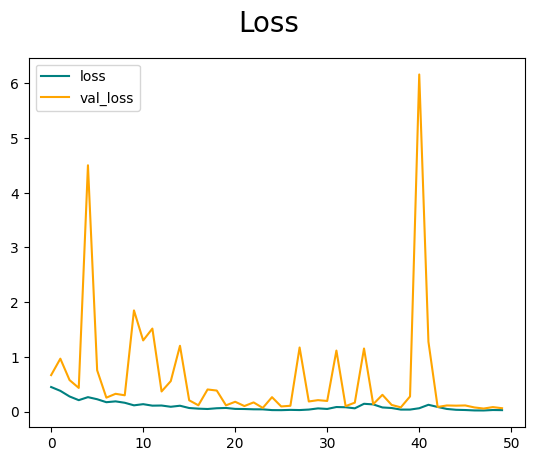

In [18]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

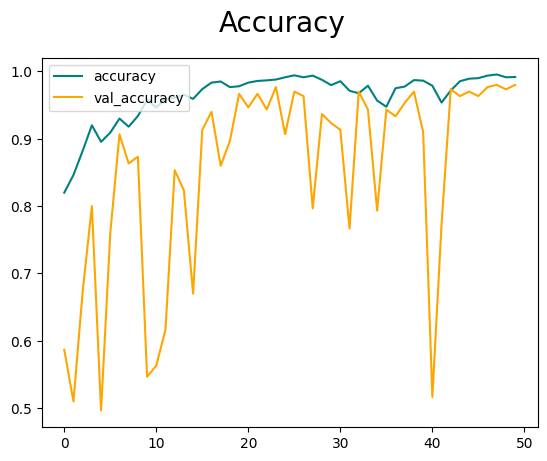

In [19]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(test)

10/10 [==============================] - 13s 301ms/step - loss: 0.0862 - accuracy: 0.9700


In [21]:
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

Test Set Loss :  0.08623191714286804
Test Set Accuracy :  0.9700000286102295
